Optimized parameters: [0.88070573 1.57078983 1.83190904 1.570803  ]
Optimized energy: -0.4999999999921242


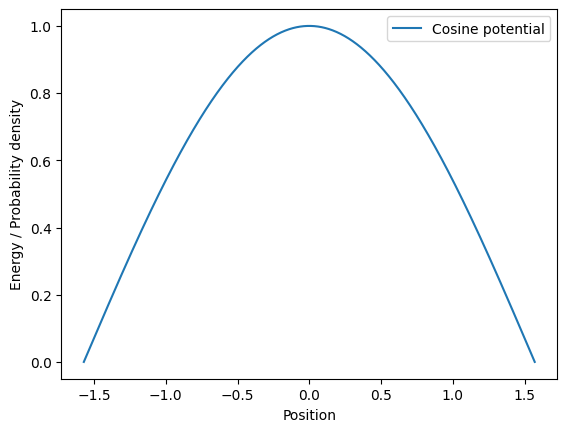

In [61]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import Statevector
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the cosine potential Hamiltonian
A = 1.0  # amplitude of the potential
k = 1.0  # wave vector of the potential
H = np.kron(
    np.array([[-0.5 * k**2, 0.0], [0.0, 0.5 * k**2]]), np.identity(2)
) + np.kron(A * np.array([[1.0, 0.0], [0.0, -1.0]]), np.identity(2))

# Define the ansatz circuit
num_qubits = 2
depth = 1
ansatz = RealAmplitudes(num_qubits, entanglement="linear", reps=depth)


# Define the function to evaluate the energy
def energy_evaluation(params):
    # Create the quantum circuit and apply the ansatz
    qc = QuantumCircuit(num_qubits)
    qc.append(ansatz.bind_parameters(params), range(num_qubits))

    # Evaluate the expectation value of the Hamiltonian
    backend = Aer.get_backend("statevector_simulator")
    result = execute(qc, backend).result()
    psi = Statevector(result.get_statevector())
    energy = np.real(np.conj(psi.data) @ H @ psi.data)
    return energy


# Run the optimization to minimize the energy
initial_params = np.random.randn(ansatz.num_parameters)
result = minimize(energy_evaluation, initial_params)
params = result.x

# Print the optimized parameters and energy
print("Optimized parameters:", params)
print("Optimized energy:", result.fun)

# Plot the cosine potential
x = np.linspace(-np.pi / 2, np.pi / 2, 1000)
y = A * np.cos(k * x)
plt.plot(x, y, label="Cosine potential")

# Add labels and legend to the plot
plt.xlabel("Position")
plt.ylabel("Energy / Probability density")
plt.legend()

# Show the plot
plt.show()

Optimized parameters: [ 3.14159021e+00  1.74660837e-05 -1.25604517e+00  1.90969230e+00
  1.97709383e-01 -2.04980121e-05  2.95781544e-01 -7.32813171e-01]
Optimized energy: -0.4999999998767084


c:\Users\dbier\miniconda3\envs\qis101\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


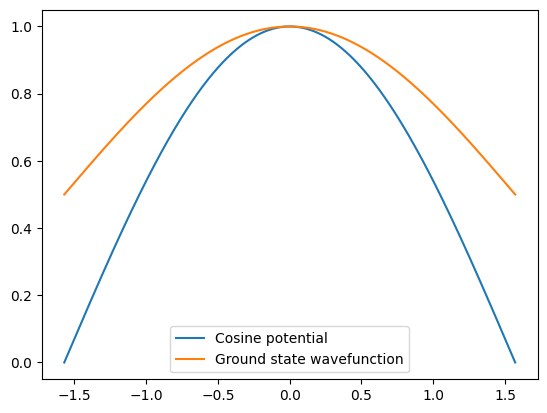

In [60]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.parameter import Parameter
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import Statevector
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the cosine potential Hamiltonian
A = 1.0  # amplitude of the potential
k = 1.0  # wave vector of the potential
H = np.kron(
    np.array([[-0.5 * k**2, 0.0], [0.0, 0.5 * k**2]]), np.identity(2)
) + np.kron(A * np.array([[1.0, 0.0], [0.0, -1.0]]), np.identity(2))

# Define the ansatz circuit
num_qubits = 2
depth = 1
ansatz = EfficientSU2(num_qubits, reps=depth)


# Define the function to evaluate the energy
def energy_evaluation(params):
    # Create the quantum circuit and apply the ansatz
    qc = ansatz.bind_parameters(params)

    # Evaluate the expectation value of the Hamiltonian
    backend = Aer.get_backend("statevector_simulator")
    result = execute(qc, backend).result()
    psi = Statevector(result.get_statevector())
    energy = np.real(np.conj(psi.data) @ H @ psi.data)
    return energy


# Run the optimization to minimize the energy
initial_params = np.random.randn(ansatz.num_parameters)
result = minimize(energy_evaluation, initial_params)
params = result.x

# Print the optimized parameters and energy
print("Optimized parameters:", params)
print("Optimized energy:", result.fun)

# Plot the cosine potential
x = np.linspace(-np.pi / 2, np.pi / 2, 1000)
y = A * np.cos(k * x)
plt.plot(x, y, label="Cosine potential")

# Plot the ground state wavefunction
qc = ansatz.bind_parameters(params)
backend = Aer.get_backend("statevector_simulator")
wavefunction = np.zeros_like(x, dtype=complex)
for i, xi in enumerate(x):
    state = np.array([np.cos(xi / 2), 0.0, 0.0, np.sin(xi / 2)])
    qc.initialize(state, [0, 1])
    result = execute(qc, backend).result()
    psi = Statevector(result.get_statevector())
    wavefunction[i] = psi.probabilities()[0]
plt.plot(x, wavefunction, label="Ground state wavefunction")

plt.legend()
plt.show()

Optimized parameters: [-0.76320957  0.7631651 ]
Optimized energy: 0.5707963270070378


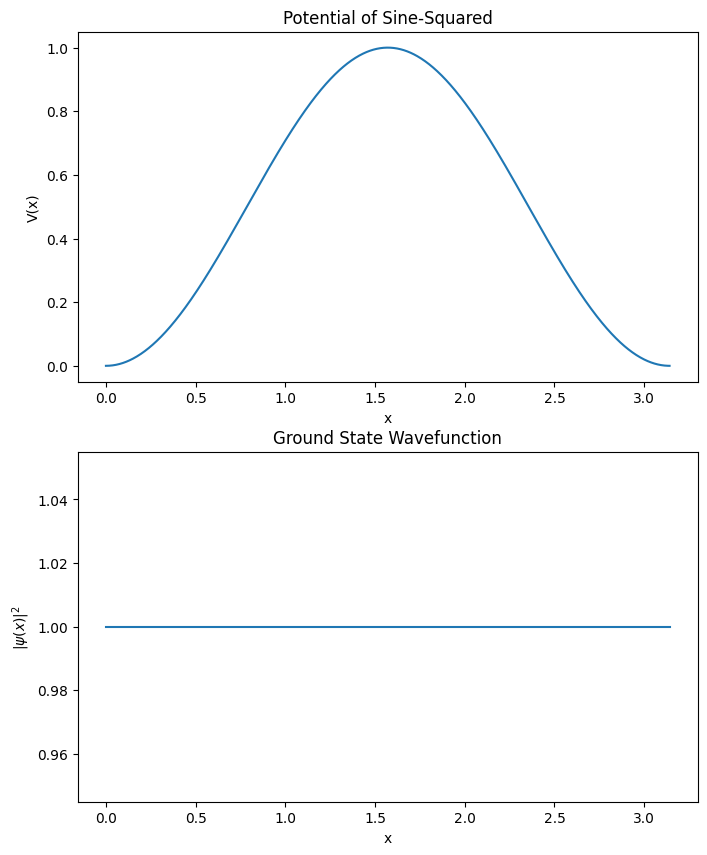

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import Statevector
from scipy.optimize import minimize

# Define the Hamiltonian
H = np.array([[-1, 0], [0, 1]])


# Define the sine-squared potential function
def V(x):
    return np.sin(x) ** 2


# Define the ansatz circuit
num_qubits = 1
depth = 1
ansatz = RealAmplitudes(num_qubits, reps=depth)


# Define the function to evaluate the energy
def energy_evaluation(params):
    # Create the quantum circuit and apply the ansatz
    qc = ansatz.assign_parameters(params)

    # Evaluate the expectation value of the Hamiltonian
    backend = Aer.get_backend("statevector_simulator")
    result = execute(qc, backend).result()
    psi = Statevector(result.get_statevector())
    energy = np.real(np.conj(psi.data) @ H @ psi.data)

    # Evaluate the expectation value of the potential
    x = np.linspace(0, np.pi, 1000)
    dx = x[1] - x[0]
    V_expectation = 0.0
    for xi in x:
        state = Statevector([np.cos(xi / 2), np.sin(xi / 2)])
        result = execute(qc, backend, initial_state=state).result()
        psi = Statevector(result.get_statevector())
        V_expectation += V(xi) * psi.probabilities()[0] * dx

    # Compute the total energy
    total_energy = energy + V_expectation
    return total_energy


# Run the optimization to minimize the energy
initial_params = np.random.randn(ansatz.num_parameters)
result = minimize(energy_evaluation, initial_params)
params = result.x

# Print the optimized parameters and energy
print("Optimized parameters:", params)
print("Optimized energy:", result.fun)

# Plot the potential and the ground state wavefunction
x = np.linspace(0, np.pi, 1000)
V_values = V(x)
ground_state = np.zeros_like(x, dtype=np.complex128)
for i, xi in enumerate(x):
    state = Statevector([np.cos(xi / 2), np.sin(xi / 2)])
    result = execute(
        ansatz.assign_parameters(params),
        backend=Aer.get_backend("statevector_simulator"),
        initial_state=state,
    ).result()
    psi = Statevector(result.get_statevector())
    ground_state[i] = psi.data[0]

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
ax[0].plot(x, V_values)
ax[0].set_xlabel("x")
ax[0].set_ylabel("V(x)")
ax[0].set_title("Potential of Sine-Squared")

ax[1].plot(x, np.abs(ground_state) ** 2)
ax[1].set_xlabel("x")
ax[1].set_ylabel("$|\psi(x)|^2$")
ax[1].set_title("Ground State Wavefunction")
plt.show()
